In [1]:
import tensorflow as tf
print(tf.__version__)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2.12.0
Notebook last run (end-to-end): 2023-08-29 21:08:23.751418


1. Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.
---


In [36]:
from sklearn.datasets import make_moons
n_samples=1000
X, y = make_moons(n_samples, shuffle=True, noise=0.1, random_state=42)

In [37]:
len(X), len(y)

(1000, 1000)

In [38]:
X.shape

(1000, 2)

In [39]:
y.shape

(1000,)

In [40]:
X[0], y[0]

(array([-0.05146968,  0.44419863]), 1)

In [41]:
# Check out all features
X, y

(array([[-0.05146968,  0.44419863],
        [ 1.03201691, -0.41974116],
        [ 0.86789186, -0.25482711],
        ...,
        [ 1.68425911, -0.34822268],
        [-0.9672013 ,  0.26367208],
        [ 0.78758971,  0.61660945]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [52]:
# train, test split
X_train = X[:800]
y_train = y[:800]
X_test = X[800:]
y_test = y[800:]
len(X_train), len(X_test)

(800, 200)

In [42]:
# Make dataframe of feature and labels
import pandas as pd
moons = pd.DataFrame({'X0':X[:,0], 'X1':X[:,1], 'label': y})
moons.head(10)

,X0,X1,label
0,-0.051470,0.444199,1
1,1.032017,-0.419741,1
2,0.867892,-0.254827,1
3,0.288851,-0.448669,1
4,-0.833439,0.535057,0
5,0.613706,-0.242369,1
6,0.286495,-0.201277,1
7,-0.056104,0.477079,1
8,1.604217,-0.303541,1
9,0.709641,0.858867,0


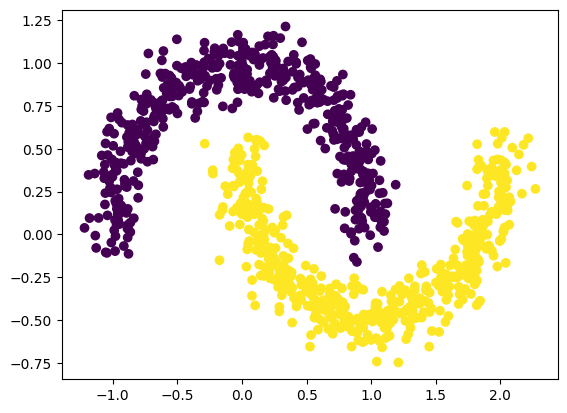

In [43]:
# Visulize the data
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

In [53]:
#Creating base_model
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
], name='base_model')

# Compile
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
model_1_history = model_1.fit(X_train,
                              y_train,
                              epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6885 - accuracy: 0.4988
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6507 - accuracy: 0.4688
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6169 - accuracy: 0.5650
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5857 - accuracy: 0.6775
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5576 - accuracy: 0.7138
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5316 - accuracy: 0.7400
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5070 - accuracy: 0.7563
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4849 - accuracy: 0.7788
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4644 - accuracy: 0.7862
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4454 - accuracy: 0.8037
Epoch 11/20
25/25 [

In [54]:
model_1_evaluation = model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.3343 - accuracy: 0.8450


In [46]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


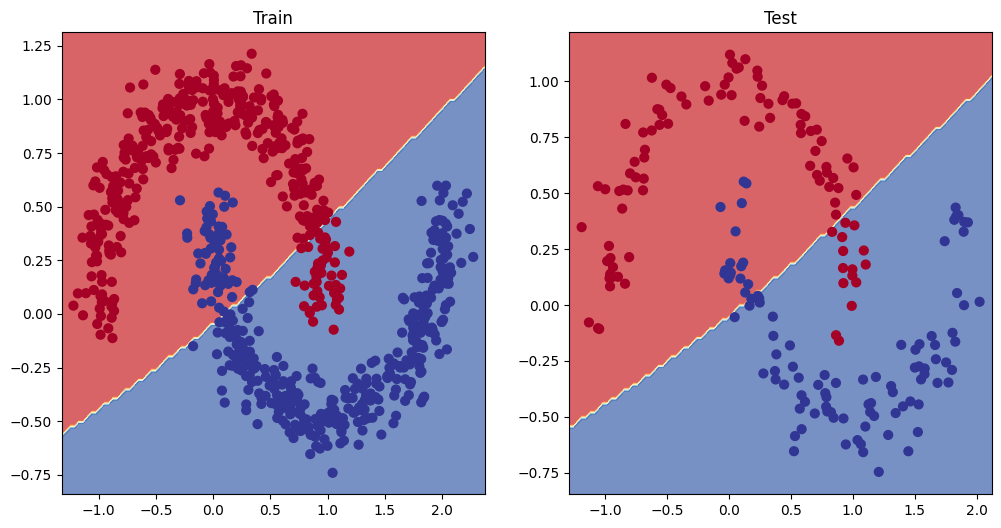

In [56]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_1, X_test, y_test)


In [57]:
#Creating model_2
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
], name='model_2')

# Compile
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
model_2_history = model_2.fit(X_train,
                              y_train,
                              epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6271 - accuracy: 0.7075
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4906 - accuracy: 0.8175
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3844 - accuracy: 0.8450
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3165 - accuracy: 0.8675
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2810 - accuracy: 0.8687
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2600 - accuracy: 0.8800
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2455 - accuracy: 0.8838
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2342 - accuracy: 0.8900
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2251 - accuracy: 0.8950
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2155 - accuracy: 0.8988
Epoch 11/20
25/25 [

In [58]:
model_2_evaluate = model_2.evaluate(X_test, y_test)

7/7 [==============================] - 1s 5ms/step - loss: 0.1181 - accuracy: 0.9500


313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


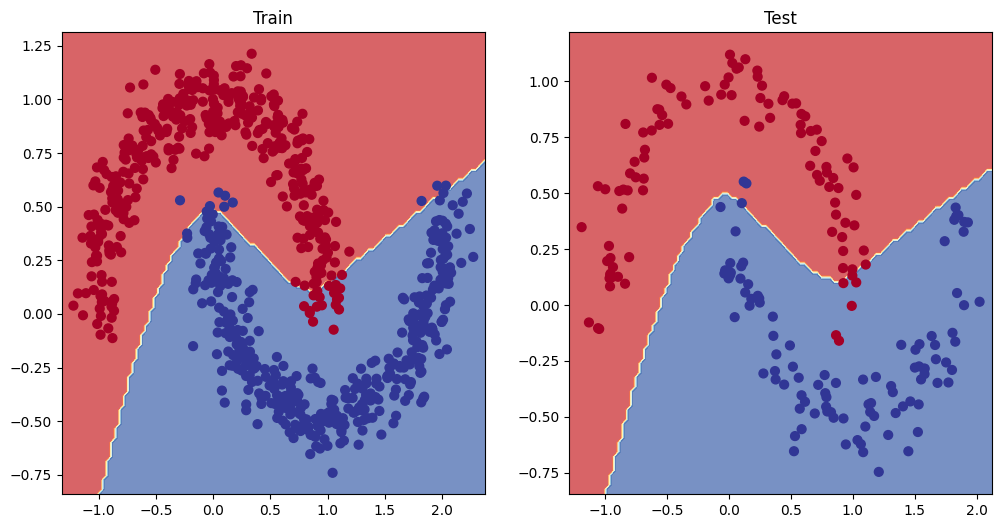

In [59]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_2, X_test, y_test)
plt.show()

In [62]:
#Creating model for lr callback
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
], name='model_3')

# Compile
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate

# Fit the model
model_3_history = model_3.fit(X_train,
                              y_train,
                              epochs=100,
                              callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7737 - accuracy: 0.5013 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7664 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7585 - accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7499 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7408 - accuracy: 0.4938 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7311 - accuracy: 0.4837 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7206 - accuracy: 0.4725 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7093 - accuracy: 0.4725 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

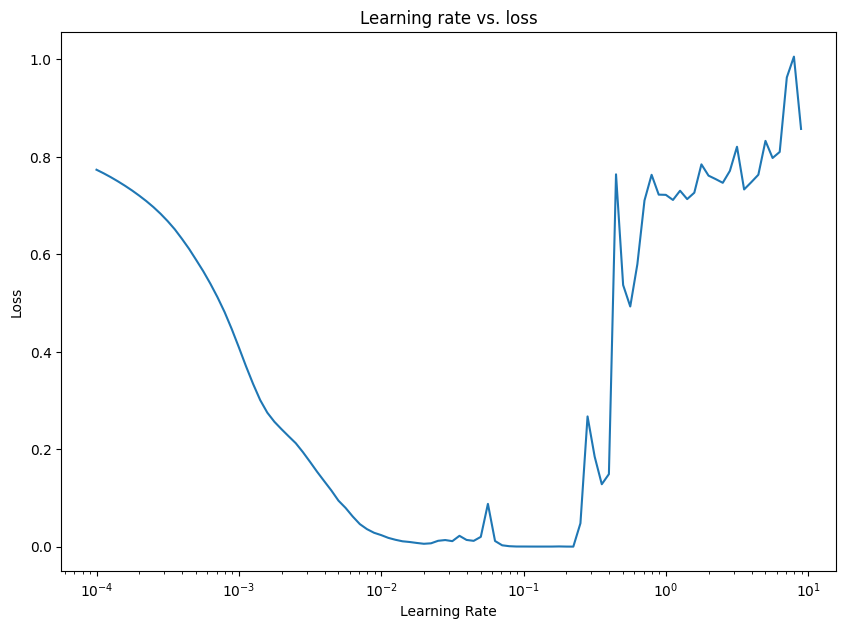

In [63]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, model_3_history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");


In [75]:
#Creating final_model
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
], name='model_4')

# Compile
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.1),
                metrics=['accuracy'])


# Fit the model
model_4_history = model_4.fit(X_train,
                              y_train,
                              validation_data=(X_test, y_test),
                              epochs=50)

Epoch 1/50
25/25 [==============================] - 2s 18ms/step - loss: 0.6282 - accuracy: 0.6975 - val_loss: 0.5742 - val_accuracy: 0.8100
Epoch 2/50
25/25 [==============================] - 0s 5ms/step - loss: 0.5326 - accuracy: 0.8487 - val_loss: 0.4988 - val_accuracy: 0.8300
Epoch 3/50
25/25 [==============================] - 0s 5ms/step - loss: 0.4692 - accuracy: 0.8650 - val_loss: 0.4511 - val_accuracy: 0.8450
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.4252 - accuracy: 0.8712 - val_loss: 0.4109 - val_accuracy: 0.8650
Epoch 5/50
25/25 [==============================] - 0s 5ms/step - loss: 0.3840 - accuracy: 0.8788 - val_loss: 0.3679 - val_accuracy: 0.8700
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.3431 - accuracy: 0.8763 - val_loss: 0.3321 - val_accuracy: 0.8650
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.3075 - accuracy: 0.8838 - val_loss: 0.3007 - val_accuracy: 0.8800
Epoch 8/50
25/25 [=

In [76]:
model_4_evaluate = model_4.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0271 - accuracy: 0.9900


<Axes: >

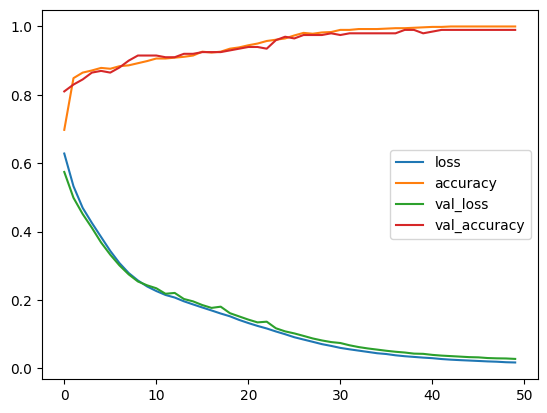

In [78]:
pd.DataFrame(model_4_history.history).plot()

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...
313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


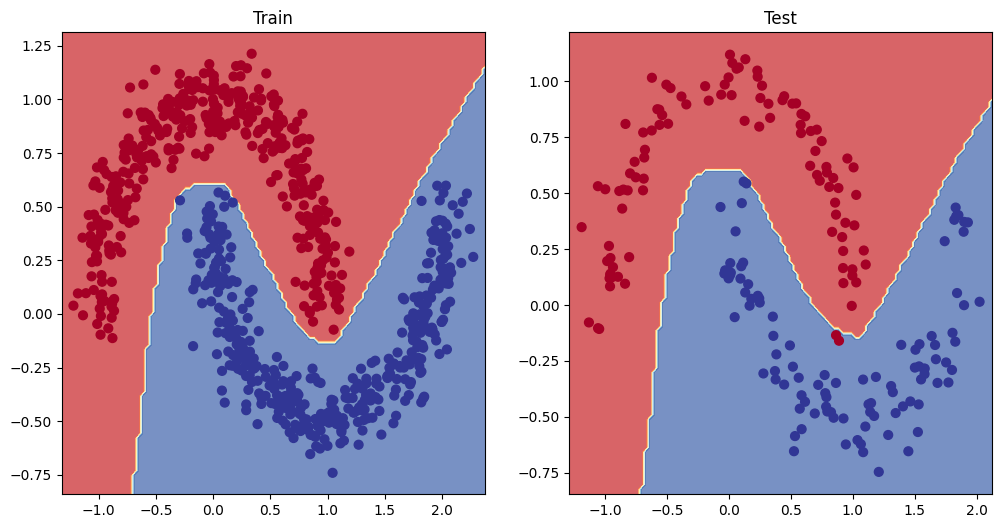

In [79]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_4, X_test, y_test)
plt.show()